<a href="https://colab.research.google.com/github/robertopcarreiro/cidacs-PgBSMI/blob/master/sinasc-lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE I - SOBRE OS DADOS

Os dados que serão utilizados para esse laboratório são os dados do Sistema de Informação sobre Nascidos Vivos – Sinasc. O Sistema de Informações sobre Nascidos Vivos (Sinasc), foi implantado oficialmente a partir de 1990, com o objetivo de coletar dados sobre os nascimentos informados em todo território nacional e fornecer dados sobre natalidade para todos os níveis do Sistema de Saúde. A implantação do Sinasc ocorreu de forma gradual em todas as unidades da Federação e já vem apresentando em muitos municípios, desde o ano de 1994, um número maior de registros do que o publicado pelo IBGE com base nos dados de Cartório de Registro Civil.

As informações sobre as variáveis encontram-se no arquivo PDF, cujo link segue abaixo:

[https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC+-+Estrutura.pdf](https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC+-+Estrutura.pdf)


Na versão atual, o dicionário é composto por 69 variáveis. Dentre estas variáveis, encontram-se dados definidos pelos especialistas para permitir gerar informações essenciais sobre as condições de nascimentos no Brasil. Por exemplo, temos:

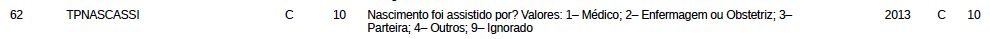

---

*   63 -> Posição
*   ESCMAEAGR1 -> Nome do Campo
*   C -> Tipo da Variável

*   10 -> Tamanho da Variável

*   Escolaridade 2010 agregada. Valores: 00 – Sem Escolaridade; 01 – Fundamental I Incompleto; 02 – Fundamental I Completo; 03 – Fundamental II Incompleto; 04 – Fundamental II Completo; 05 – Ensino Médio Incompleto; 06 – Ensino Médio Completo; 07 – Superior Incompleto; 08 – Superior Completo; 09 – Ignorado; 10 – Fundamental I Incompleto ou Inespecífico; 11 – Fundamental II Incompleto ou Inespecífico; 12 – Ensino Médio Incompleto ou Inespecífico. -> Descrição

*   2013 -> Ano Inicial

*   C -> Tipo Inicial

*   10 -> Tamanho Inicial

---
Observação: acessar o arquivo PDF com o dicionário para entender as variáveis que estão disponíveis.


Os dados foram obitidos no Open Datasus: https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-nascidos-vivos-sinasc-1996-a-2020

Os arquivos foram disponibilizados na pasta dados (/content).

Os arquivos correspondem aos anos de 2020 (922 MB), 2019 (963 MB) e 2018 (996 GB). Assim, temos:

*   SINASC_2018.csv
*   SINASC_2019.csv
*   SINASC_2020.csv

Os arquivos do tipo CSV - Comma Separated Values são muito utilizados na Ciência de Dados.

# PARTE 2 - COMO LER OS DADOS

Utilizaremos a linguagem de programação Python para realizar essa atividade prática. Acessem este [link](https://www.cienciaedados.com/por-que-cientistas-de-dados-escolhem-python/) para saber mais sobre Python e seu uso na Ciencia de Dados.

Importamos algumas biblioteca que existem para manipular arquivos do tipo CSV.

In [ ]:
import pandas as pd
import csv

Executamos o comando de leitura do arquivo


In [ ]:
sinasc_pdf_2020 = pd.read_csv('/content/SINASC_2020.csv',
                              header=0,
                              sep=';',
                              quotechar='"')

FileNotFoundError: ignored

Agora vamos visualizar os 5 primeiros registros e os 5 úlyimos para validar que o arquivo foi lido corretamente.

In [ ]:
#pd.set_option('display.max_columns', 100)
sinasc_pdf_2020.head(-5)

NameError: ignored

# PARTE 3 - COMO DESCREVER OS DADOS

Outra validação interessante para verificar se o arquivo foi lido corretamente é gerar informações sobre as variáveis encontradas e o numero de registros.

In [ ]:
sinasc_pdf_2020.info()

NameError: ignored

Descrever um pouco mais as variáveis.

In [ ]:
sinasc_pdf_2020.describe()

In [ ]:
pd.set_option('display.max_rows', 100)
sinasc_pdf_2020.nunique()

# PARTE 4 - COMO VISUALIZAR OS DADOS

Importar as bibliotecas utilizadas para visualização.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Histograma utilizando o número de anos da escolaridade da mãe.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


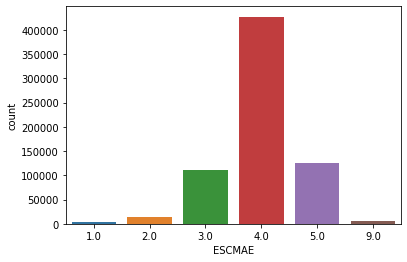

In [ ]:
y = sinasc_pdf_2020['ESCMAE']
ax = sns.countplot(y,label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


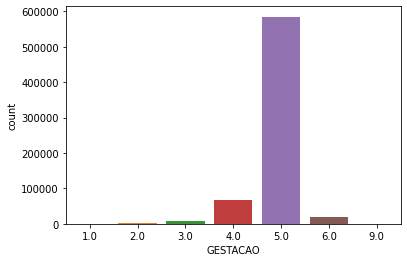

In [ ]:
y = sinasc_pdf_2020['GESTACAO']
ax = sns.countplot(y,label="Count")

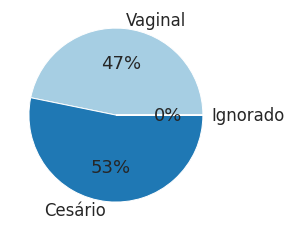

In [ ]:
parto_vaginal = sinasc_pdf_2020[sinasc_pdf_2020['PARTO']==1]['PARTO'].count()
parto_cesario= sinasc_pdf_2020[sinasc_pdf_2020['PARTO']==2]['PARTO'].count()
parto_ignorado= sinasc_pdf_2020[sinasc_pdf_2020['PARTO']==9]['PARTO'].count()

sns.set_theme(palette="dark", font="arial", font_scale= 1.5)
data = [parto_vaginal, parto_cesario, parto_ignorado]
parto = ['Vaginal', 'Cesário', 'Ignorado']
plt.pie(data, labels=parto, colors = sns.color_palette('Paired')[0:4], autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


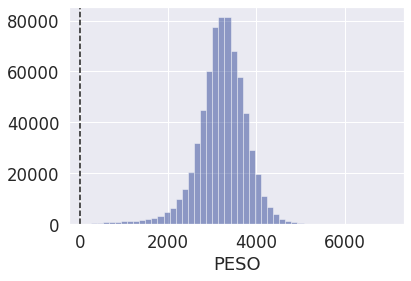

In [ ]:
sns.distplot(sinasc_pdf_2020['PESO'], kde=False);
plt.axvline(0, color="k", linestyle="--");

# PARTE 5 - SELECIONANDO VARIÁVEIS

In [ ]:
sinasc_pdf_2020[['PESO','SEXO','RACACOR']]

,PESO,SEXO,RACACOR
0,3650.0,2.0,1.0
1,1400.0,2.0,4.0
2,3455.0,1.0,4.0
3,3620.0,1.0,4.0
4,2400.0,2.0,4.0
...,...,...,...
46251,3005.0,2.0,4.0
46252,3020.0,2.0,4.0
46253,1970.0,2.0,4.0
46254,3270.0,1.0,4.0
